# Questions regarding Data Set
- what is data source? -> __The Data from [Data.gov](https://www.data.gov) that is about obesity for WIC__
- how many columns and rows are there
- name of columns
- which state has most sample size
- which year period has the biggest or most sample size for each state
- what are the age groups
- which state(s) has younger age groups? -> __all states have same size age groups__
- which state has oldest group of people/samples? -> __all states have same size age groups__
- what are the race ethnicities? -> __all race ethncities groups have same group of sample sizes__
- which state has the most or highest sample size of non hispanic-black (only african american)? -> __Florida has highest number of sample size for 2008/2010/2014 and Georgia has highest number of sample sizes for 2012. According to US Census Bureau 2016 [Data](http://blackdemographics.com/population/black-state-population/), New York has the largest and Texas has the second largest African American population. So our data set has bias on Sample Sizes__
- which state has the most or highest sample size of hispanic-black (everybody besides african americans)
- create a flu shot for an age group between (18 months - 23 months)
- create a pie chart of the slice of people of the above age group for __each__ state
- display geoLocation of each state with their total (total summation) sample sizes with __4 seperate different year map__
---

## Importing required libraries and their specs

In [1]:
# making my data structured
import numpy as np 

# importing,reindexing,querying data
import pandas as pd 

# displaying data in plotting format
import matplotlib.pyplot as plt 

# display locations
import folium

# Enables plotting in Jupyter
%matplotlib inline 

# Prettier plots
plt.style.use('ggplot') 

# increasing size of plots
plt.rcParams['figure.figsize'] = (20, 7) 

## Importing Data Set

In [2]:
#Importing data set
healthData = pd.read_csv("../Data/Nutrition__Physical_Activity__and_Obesity_-_Women__Infant__and_Child.csv")

In [3]:
# Example of first row containtaing all columns in data set
healthData.iloc[0] 

YearStart                                                                  2008
YearEnd                                                                    2008
LocationAbbr                                                                 AL
LocationDesc                                                            Alabama
Datasource                    Women, Infants, and Children Participant and P...
Class                                                   Obesity / Weight Status
Topic                                                   Obesity / Weight Status
Question                      Percent of WIC children aged 2 to 4 years who ...
Data_Value_Unit                                                             NaN
Data_Value_Type                                                           Value
Data_Value                                                                 15.4
Data_Value_Alt                                                             15.4
Data_Value_Footnote_Symbol              

In [4]:
# shape of data set
healthData.shape

(7344, 31)

In [5]:
# first five rows of all columns
healthData.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2008,2008,AL,Alabama,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q040,VALUE,1,Total,Total,OVR,OVERALL
1,2008,2008,AL,Alabama,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q040,VALUE,1,Gender,Male,GEN,MALE
2,2008,2008,AL,Alabama,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q040,VALUE,1,Gender,Female,GEN,FEMALE
3,2008,2008,AL,Alabama,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q040,VALUE,1,Age (months),24 - 35,AGEMO,AGEMO2435
4,2008,2008,AL,Alabama,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q040,VALUE,1,Age (months),36 - 47,AGEMO,AGEMO3647


In [6]:
# displays descriptive statistics values of selected* columns
# *only numerical values columns
healthData.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,7344.00000,7344.00000,0.0,7153.000000,7153.000000,7153.000000,7153.000000,7153.000000,7344.000000
mean,2011.00000,2011.00000,NaN,14.249490,14.249490,12.872571,15.627387,19027.823571,31.351852
std,2.23622,2.23622,NaN,3.737871,3.737871,4.065295,4.057627,41023.632114,18.184622
min,2008.00000,2008.00000,NaN,1.500000,1.500000,0.000000,3.700000,50.000000,1.000000
25%,2009.50000,2009.50000,NaN,11.900000,11.900000,10.500000,13.100000,1816.000000,17.000000
50%,2011.00000,2011.00000,NaN,14.400000,14.400000,13.300000,15.500000,7968.000000,30.500000
75%,2012.50000,2012.50000,NaN,16.500000,16.500000,15.600000,17.600000,20861.000000,45.000000
max,2014.00000,2014.00000,NaN,36.100000,36.100000,34.500000,37.700000,620016.000000,78.000000


In [7]:
# gives info about each columns number of rows and data type with null status
healthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 31 columns):
YearStart                     7344 non-null int64
YearEnd                       7344 non-null int64
LocationAbbr                  7344 non-null object
LocationDesc                  7344 non-null object
Datasource                    7344 non-null object
Class                         7344 non-null object
Topic                         7344 non-null object
Question                      7344 non-null object
Data_Value_Unit               0 non-null float64
Data_Value_Type               7344 non-null object
Data_Value                    7153 non-null float64
Data_Value_Alt                7153 non-null float64
Data_Value_Footnote_Symbol    191 non-null object
Data_Value_Footnote           191 non-null object
Low_Confidence_Limit          7153 non-null float64
High_Confidence_Limit         7153 non-null float64
Sample_Size                   7153 non-null float64
Total                      

# Data about age in months

In [8]:
# all possible age categories
healthData["Age(months)"].value_counts()

36 - 47    432
48 - 59    432
24 - 35    432
12 - 17    216
6 - 11     216
18 - 23    216
3 - 5      216
Name: Age(months), dtype: int64

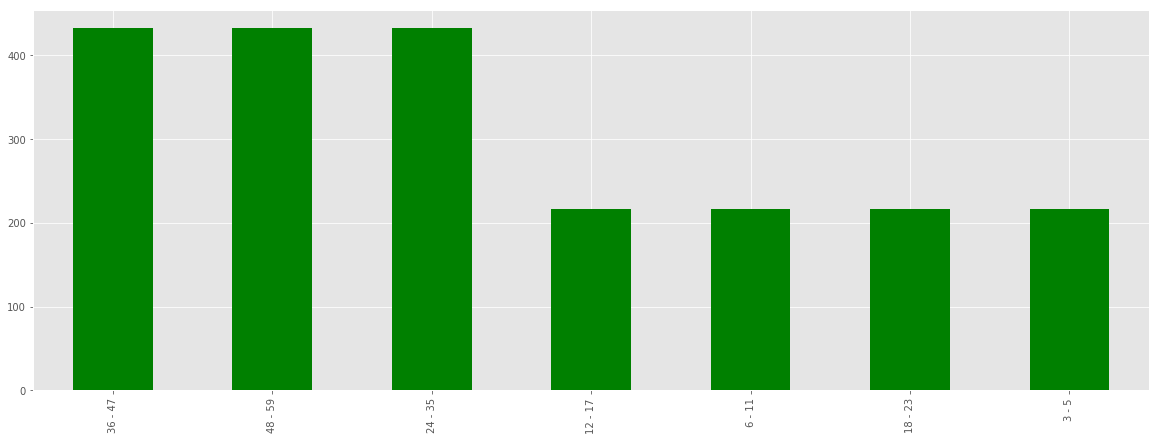

In [9]:
# shows number of occurances for each age (months) group
healthData["Age(months)"].value_counts().plot(kind="bar", color="green")

In [10]:
# finding the youngest age group
healthData[healthData["Age(months)"] == "3 - 5"]["LocationDesc"].value_counts()

Maine                   4
Louisiana               4
Montana                 4
Connecticut             4
Alaska                  4
Virginia                4
Utah                    4
Kansas                  4
Michigan                4
Iowa                    4
Arizona                 4
Idaho                   4
Texas                   4
Maryland                4
Nevada                  4
Indiana                 4
Puerto Rico             4
New Mexico              4
Arkansas                4
Oregon                  4
Illinois                4
Wisconsin               4
Minnesota               4
Delaware                4
Oklahoma                4
Guam                    4
New Hampshire           4
Massachusetts           4
West Virginia           4
South Carolina          4
Tennessee               4
North Carolina          4
Washington              4
New York                4
New Jersey              4
Colorado                4
South Dakota            4
Alabama                 4
Ohio        

In [11]:
# finding the oldest age group
healthData[healthData["Age(months)"] == "36 - 47"]["LocationDesc"].value_counts()

Maine                   8
Louisiana               8
Montana                 8
Connecticut             8
Alaska                  8
Virginia                8
Utah                    8
Kansas                  8
Michigan                8
Iowa                    8
Arizona                 8
Idaho                   8
Texas                   8
Maryland                8
Nevada                  8
Indiana                 8
Puerto Rico             8
New Mexico              8
Arkansas                8
Oregon                  8
Illinois                8
Wisconsin               8
Minnesota               8
Delaware                8
Oklahoma                8
Guam                    8
New Hampshire           8
Massachusetts           8
West Virginia           8
South Carolina          8
Tennessee               8
North Carolina          8
Washington              8
New York                8
New Jersey              8
Colorado                8
South Dakota            8
Alabama                 8
Ohio        

In [70]:
# verify numbers listed above
newYork = healthData[healthData["LocationDesc"] == "New York"]
newYork[newYork["Age(months)"] == "18 - 23"]["Sample_Size"].cumsum()

3296     17315.0
6548     61303.0
6549    103268.0
6550    142445.0
Name: Sample_Size, dtype: float64

# State distribution of babies with ages of 18 - 23

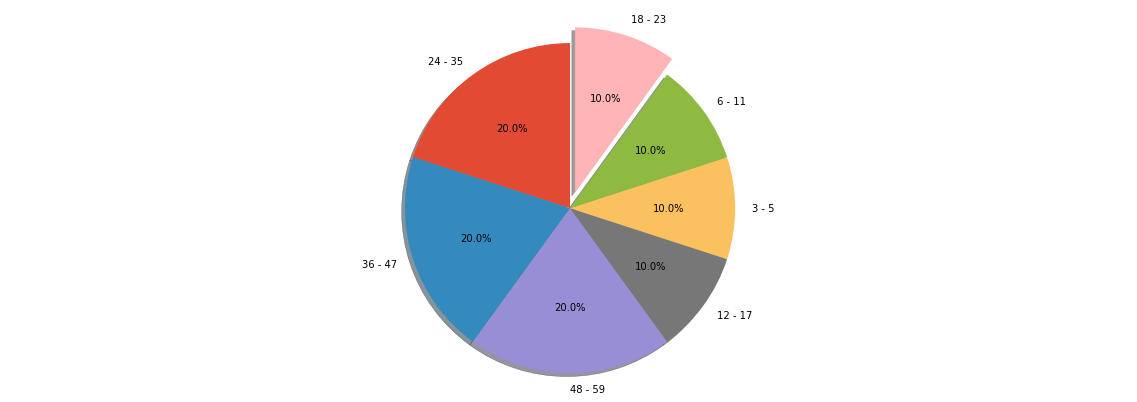

In [12]:
#you can pick an arbritary state since they have all the same values
fig1, ax1 = plt.subplots()

ax1.pie([value for value in healthData[healthData["LocationDesc"] == "New York"]["Age(months)"].value_counts()], 
                explode=[0,0,0,0,0,0,0.1], 
                labels=healthData[healthData["LocationDesc"] == "California"]["Age(months)"].value_counts().index,
                autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

---
# Data on Race/Ethnicity

In [13]:
# Displays unique race ethnicity values of the data set
healthData["Race/Ethnicity"].value_counts()

Non-Hispanic White               648
Hispanic                         648
Asian/Pacific Islander           648
American Indian/Alaska Native    648
Non-Hispanic Black               648
Name: Race/Ethnicity, dtype: int64

In [14]:
# Check for number of race groups in each state for each year
[healthData[healthData["Race/Ethnicity"] == ethnicityGroup]["LocationDesc"].value_counts() 
                     for ethnicityGroup in healthData["Race/Ethnicity"].value_counts().index]

[Maine                   12
 Louisiana               12
 Montana                 12
 Connecticut             12
 Alaska                  12
 Virginia                12
 Utah                    12
 Kansas                  12
 Michigan                12
 Iowa                    12
 Arizona                 12
 Idaho                   12
 Texas                   12
 Maryland                12
 Nevada                  12
 Indiana                 12
 Puerto Rico             12
 New Mexico              12
 Arkansas                12
 Oregon                  12
 Illinois                12
 Wisconsin               12
 Minnesota               12
 Delaware                12
 Oklahoma                12
 Guam                    12
 New Hampshire           12
 Massachusetts           12
 West Virginia           12
 South Carolina          12
 Tennessee               12
 North Carolina          12
 Washington              12
 New York                12
 New Jersey              12
 Colorado           

# States with highest african american population

In [15]:
blackPeople = healthData[healthData["Race/Ethnicity"] == "Non-Hispanic Black"]

In [16]:
# find total cum sum for each state black people total sample sizes
# break into 4 years
# find total cum sum for each year in each state

blackPeople2008 = blackPeople[blackPeople["YearStart"] == 2008]
blackPeople2010 = blackPeople[blackPeople["YearStart"] == 2010]
blackPeople2012 = blackPeople[blackPeople["YearStart"] == 2012]
blackPeople2014 = blackPeople[blackPeople["YearStart"] == 2014]

blackPeopleTotalSampleSizes2008 = []
blackPeopleTotalSampleSizes2010 = []
blackPeopleTotalSampleSizes2012 = []
blackPeopleTotalSampleSizes2014 = []

for state in blackPeople["LocationDesc"].value_counts().index:
    blackPeopleTotalSampleSizes2008.append((state,
                                            blackPeople2008[blackPeople2008["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1]))
    blackPeopleTotalSampleSizes2010.append((state,
                                            blackPeople2010[blackPeople2010["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1]))
    blackPeopleTotalSampleSizes2012.append((state,
                                            blackPeople2012[blackPeople2012["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1]))
    blackPeopleTotalSampleSizes2014.append((state,
                                            blackPeople2014[blackPeople2014["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1]))

In [17]:
maxSum = 0
maxCount = 0
for count in range(len(blackPeopleTotalSampleSizes2008)):
    if blackPeopleTotalSampleSizes2008[count][1] > maxSum:
        maxSum = blackPeopleTotalSampleSizes2008[count][1]
        maxCount = count
print blackPeopleTotalSampleSizes2008[maxCount]

('Florida', 121042.0)


In [18]:
maxSum = 0
maxCount = 0
for count in range(len(blackPeopleTotalSampleSizes2010)):
    if blackPeopleTotalSampleSizes2010[count][1] > maxSum:
        maxSum = blackPeopleTotalSampleSizes2010[count][1]
        maxCount = count
print blackPeopleTotalSampleSizes2010[maxCount]

('Florida', 152810.0)


In [19]:
maxSum = 0
maxCount = 0
for count in range(len(blackPeopleTotalSampleSizes2012)):
    if blackPeopleTotalSampleSizes2012[count][1] > maxSum:
        maxSum = blackPeopleTotalSampleSizes2012[count][1]
        maxCount = count
print blackPeopleTotalSampleSizes2012[maxCount]

('Georgia', 142972.0)


In [20]:
maxSum = 0
maxCount = 0
for count in range(len(blackPeopleTotalSampleSizes2014)):
    if blackPeopleTotalSampleSizes2008[count][1] > maxSum:
        maxSum = blackPeopleTotalSampleSizes2014[count][1]
        maxCount = count
print blackPeopleTotalSampleSizes2014[maxCount]

('Florida', 155811.0)


# States with highest non- african american population

In [21]:
notblackPeople = healthData[healthData["Race/Ethnicity"] != "Non-Hispanic Black"]

In [22]:
# find total cum sum for each state of everybody but black people total sample sizes
# break into 4 years
# find total cum sum for each year in each state

notblackPeople2008 = notblackPeople[notblackPeople["YearStart"] == 2008]
notblackPeople2010 = notblackPeople[notblackPeople["YearStart"] == 2010]
notblackPeople2012 = notblackPeople[notblackPeople["YearStart"] == 2012]
notblackPeople2014 = notblackPeople[notblackPeople["YearStart"] == 2014]

notblackPeopleTotalSampleSizes2008 = []
notblackPeopleTotalSampleSizes2010 = []
notblackPeopleTotalSampleSizes2012 = []
notblackPeopleTotalSampleSizes2014 = []

for state in notblackPeople["LocationDesc"].value_counts().index:
    notblackPeopleTotalSampleSizes2008.append((state,
                                            notblackPeople2008[notblackPeople2008["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1]))
    notblackPeopleTotalSampleSizes2010.append((state,
                                            notblackPeople2010[notblackPeople2010["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1]))
    notblackPeopleTotalSampleSizes2012.append((state,
                                            notblackPeople2012[notblackPeople2012["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1]))
    notblackPeopleTotalSampleSizes2014.append((state,
                                            notblackPeople2014[notblackPeople2014["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1]))

In [23]:
maxSum = 0
maxCount = 0
for count in range(len(notblackPeopleTotalSampleSizes2008)):
    if notblackPeopleTotalSampleSizes2008[count][1] > maxSum:
        maxSum = notblackPeopleTotalSampleSizes2008[count][1]
        maxCount = count
print notblackPeopleTotalSampleSizes2008[maxCount]

('California', 5609937.0)


In [24]:
maxSum = 0
maxCount = 0
for count in range(len(notblackPeopleTotalSampleSizes2010)):
    if notblackPeopleTotalSampleSizes2010[count][1] > maxSum:
        maxSum = notblackPeopleTotalSampleSizes2010[count][1]
        maxCount = count
print notblackPeopleTotalSampleSizes2010[maxCount]

('California', 6170917.0)


In [25]:
maxSum = 0
maxCount = 0
for count in range(len(notblackPeopleTotalSampleSizes2012)):
    if notblackPeopleTotalSampleSizes2012[count][1] > maxSum:
        maxSum = notblackPeopleTotalSampleSizes2012[count][1]
        maxCount = count
print notblackPeopleTotalSampleSizes2012[maxCount]

('California', 6550403.0)


In [26]:
maxSum = 0
maxCount = 0
for count in range(len(notblackPeopleTotalSampleSizes2014)):
    if notblackPeopleTotalSampleSizes2008[count][1] > maxSum:
        maxSum = notblackPeopleTotalSampleSizes2014[count][1]
        maxCount = count
print notblackPeopleTotalSampleSizes2014[maxCount]

('California', 5907052.0)


---

# Getting rid of useless data and using the following columns:
| __Name of Columns__ |
| -------------  |
| YearStart       |
| YearEnd       |
|LocationDesc|
|Data_Value|
|Sample_Size|
|Age(months)|
|Gender|
|Race/Ethnicity|
|GeoLocation|
|ClassID|

In [27]:
# because they answer our questions
newData = pd.DataFrame(data=healthData[["YearStart", "YearEnd", "LocationDesc", "Data_Value", "Sample_Size",
                                       "Age(months)", "Gender", "Race/Ethnicity", "GeoLocation", "ClassID"]])

In [28]:
# top five rows
newData.head()

,YearStart,YearEnd,LocationDesc,Data_Value,Sample_Size,Age(months),Gender,Race/Ethnicity,GeoLocation,ClassID
0,2008,2008,Alabama,15.4,43287.0,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS
1,2008,2008,Alabama,15.5,21912.0,NaN,Male,NaN,"(32.84057112200048, -86.63186076199969)",OWS
2,2008,2008,Alabama,15.3,21375.0,NaN,Female,NaN,"(32.84057112200048, -86.63186076199969)",OWS
3,2008,2008,Alabama,15.3,18219.0,24 - 35,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS
4,2008,2008,Alabama,14.9,14796.0,36 - 47,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS


In [29]:
# shape of data set
newData.shape

(7344, 10)

## Top 25 counts of Sample Size for all Years:

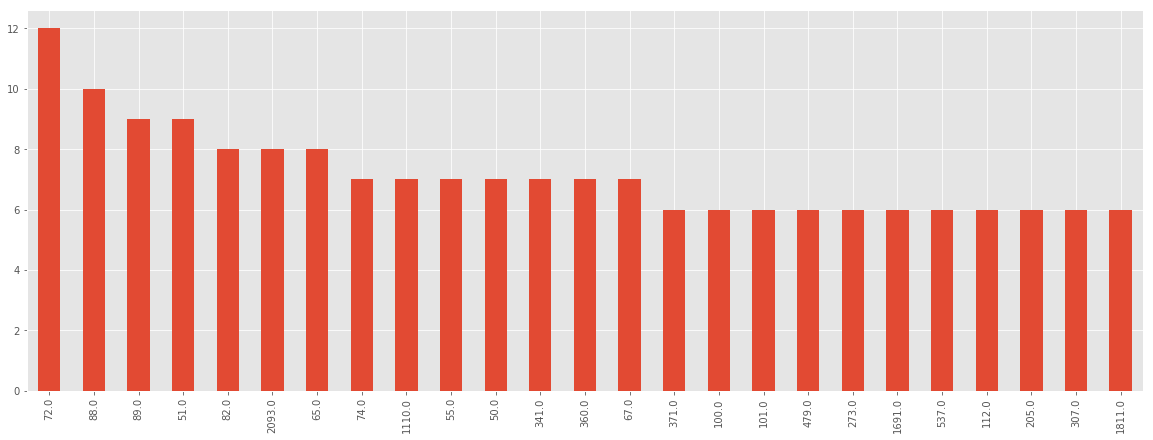

In [30]:
# we select top 25 samples sizes to get a good indication of the next sample size conducted and to determine
                                                                                # how accurate our data can be
newData["Sample_Size"].value_counts().iloc[:25].plot(kind="bar")

# Map for 2008 Study

In [31]:
# Template of Folium Map
yearStart2008 = folium.Map(location=[39.0997, -94.5786], zoom_start=4)

In [32]:
yearStart2008

In [33]:
# creating the places of each states and territories 
locations = np.zeros((54, 2), dtype=np.float32)

In [34]:
# unique lattitude and longitude values for each state/territories
capitals = newData["GeoLocation"].value_counts()

In [35]:
# parsing and formatting each location to store on locations matrix and to pin on Folium Map
counter = 0
for i in capitals.iteritems():
    locations[counter][0] = i[0].split("(")[1].split(",")[0]
    #print i[0].split("(")[1].split(",")[0],
    locations[counter][1] = i[0].split("(")[1].split(",")[1].split(")")[0]
    counter += 1
    #print i[0].split("(")[1].split(",")[1].split(")")[0]

In [36]:
# list of locations for each state and territory
locations

array([[  38.63579178,  -92.56629944],
       [  39.3606987 , -111.58712769],
       [  37.63864136, -121.        ],
       [  35.46622086,  -79.15924835],
       [  34.52088165, -106.2405777 ],
       [  38.34774017,  -98.20078278],
       [  28.93204117,  -81.92896271],
       [  31.31266022,  -92.44567871],
       [  38.89037323,  -77.03195953],
       [  37.54267883,  -78.45789337],
       [  46.35564804,  -94.79419708],
       [  43.68262863, -114.36373138],
       [  40.48501205,  -88.99771118],
       [  39.76691055,  -86.14996338],
       [  34.86597061, -111.7638092 ],
       [  13.44430447,  144.79373169],
       [  33.99882126,  -81.04537201],
       [  42.82699966,  -75.5439682 ],
       [  43.62538147,  -72.51763916],
       [  37.64596939,  -84.77497101],
       [  47.06652832, -109.42442322],
       [  39.29058075,  -76.60926056],
       [  44.56744766, -120.1550293 ],
       [  35.47203064,  -97.52107239],
       [  41.6410408 ,  -99.36572266],
       [  41.56266022,  -

In [37]:
# pinning longitude and lattitude with respect to state/territory name
count = 0
for location in locations:
    folium.Marker(location=location, popup=str(newData[newData["GeoLocation"] == capitals.index[count]]["LocationDesc"].iloc[0])).add_to(yearStart2008)
    count += 1

In [38]:
yearStart2008

# Cumulative Sample Size per State - 2008

In [39]:
# the finding of each states and territories cumulative sum of total sample sizes for the year of 2008

year2008 = newData[newData["YearStart"] == 2008]

stateSample2008 = []
for state in newData["LocationDesc"].value_counts().index:
    if np.isnan((year2008[year2008["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1])):
        stateSample2008.append((0.0, state))
    else:
        stateSample2008.append((year2008[year2008["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1], state))

In [40]:
# list of total sample sizes by total cum. sum
stateSample2008

[(528905.0, 'Alabama'),
 (806334.0, 'North Carolina'),
 (197350.0, 'Nebraska'),
 (72000.0, 'Vermont'),
 (73704.0, 'New Hampshire'),
 (228208.0, 'Nevada'),
 (905464.0, 'Pennsylvania'),
 (61512.0, 'North Dakota'),
 (1082840.0, 'Georgia'),
 (5698225.0, 'California'),
 (249147.0, 'New Mexico'),
 (69520.0, 'Delaware'),
 (109184.0, 'Maine'),
 (1142736.0, 'Ohio'),
 (498480.0, 'Kentucky'),
 (1609464.0, 'Florida'),
 (0.0, 'Virgin Islands'),
 (458613.0, 'Oregon'),
 (306652.0, 'Iowa'),
 (629500.0, 'Arizona'),
 (436812.0, 'Maryland'),
 (789018.0, 'Washington'),
 (587153.0, 'New Jersey'),
 (94624.0, 'Alaska'),
 (306688.0, 'Kansas'),
 (414014.0, 'Louisiana'),
 (0.0, 'Tennessee'),
 (339369.0, 'Mississippi'),
 (43426.0, 'Wyoming'),
 (542499.0, 'Minnesota'),
 (152368.0, 'Hawaii'),
 (357980.0, 'South Carolina'),
 (497860.0, 'Virginia'),
 (251141.0, 'Utah'),
 (158516.0, 'Idaho'),
 (1756786.0, 'New York'),
 (344836.0, 'Colorado'),
 (451000.0, 'Wisconsin'),
 (877371.0, 'Puerto Rico'),
 (264044.0, 'Arkansas

In [41]:
# Sorts from largest to smallest
stateSample2008 = sorted(stateSample2008, reverse=True)

In [42]:
# Top 5 largest sample sizes of states in 2008
stateSample2008[:5]

[(5698225.0, 'California'),
 (3295264.0, 'Texas'),
 (1756786.0, 'New York'),
 (1609464.0, 'Florida'),
 (1142736.0, 'Ohio')]

In [43]:
# adding info for each states/territories cum. sum in 2008

count = 0
for state in stateSample2008:
    locationList = []
    x = newData[newData["LocationDesc"] == str(stateSample2008[count][1])]["GeoLocation"].iloc[0].split(',')[0].split('(')[1]
    y = newData[newData["LocationDesc"] == str(stateSample2008[count][1])]["GeoLocation"].iloc[0].split(',')[1].split(')')[0]
    locationList.append(x)
    locationList.append(y)
    folium.Marker(location=locationList, popup=str(stateSample2008[count][1]) + "\n" + 
                  str(stateSample2008[count][0])).add_to(yearStart2008)
    count += 1

In [44]:
yearStart2008

# Pie Chart of the 5 Largest State Cum. Sample Size - 2008

In [45]:
# Preparing data for displaying 5 largest state cum. sum on pie chart for 2008

labels2008 = []
top_2008 = []
explode = []
count = 0
maxCumSum = 0
maxIndex = 0

for state in stateSample2008:
    labels2008.append(stateSample2008[count][1])
    if not np.isnan(stateSample2008[count][0]):    
        top_2008.append(stateSample2008[count][0])
    else:
        top_2008.append(0)
    if stateSample2008[count][0] > maxCumSum:
        maxCumSum = stateSample2008[count][0]
        maxIndex = count
    explode.append(0)
    count += 1

explode[maxIndex] = 0.1

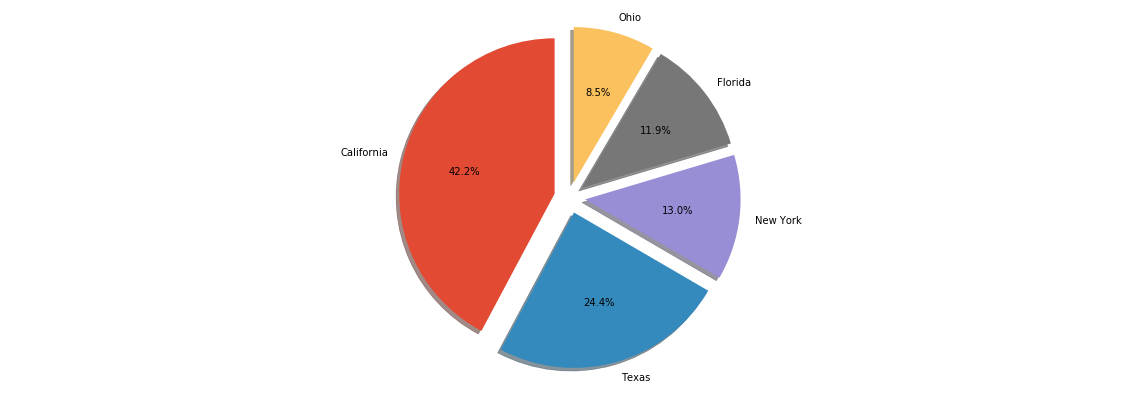

In [46]:
fig1, ax1 = plt.subplots()

ax1.pie(top_2008[:5], explode=[0.1, 0.1, 0.1, 0.1, 0.1], labels=labels2008[:5],
                autopct='%1.1f%%', shadow=True, startangle=90) #Displays 5 largest Sample Size

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 2010 Sample (Same process as above with according to data set)

In [47]:
yearStart2010 = folium.Map(location=[39.0997, -94.5786], zoom_start=4)

locations = np.zeros((54, 2), dtype=np.float32)

year2010 = newData[newData["YearStart"] == 2010]

stateSample2010 = []
for state in newData["LocationDesc"].value_counts().index:
    if np.isnan((year2010[year2010["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1])):
        stateSample2010.append((0.0, state))
    else:
        stateSample2010.append((year2010[year2010["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1], state))

stateSample2010 = sorted(stateSample2010, reverse=True) #Sorts from largest to smallest

count = 0
for state in stateSample2010:
    locationList = []
    x = newData[newData["LocationDesc"] == str(stateSample2010[count][1])]["GeoLocation"].iloc[0].split(',')[0].split('(')[1]
    y = newData[newData["LocationDesc"] == str(stateSample2010[count][1])]["GeoLocation"].iloc[0].split(',')[1].split(')')[0]
    locationList.append(x)
    locationList.append(y)
    folium.Marker(location=locationList, popup=str(stateSample2010[count][1]) + "\n" + 
                  str(stateSample2010[count][0])).add_to(yearStart2010)
    count += 1

# Pie Chart of the 5 Largest State Cum. Sample Size - 2008

labels2010 = []
top_2010 = []
explode = []
count = 0
maxCumSum = 0
maxIndex = 0

for state in stateSample2010:
    labels2010.append(stateSample2010[count][1])
    if not np.isnan(stateSample2010[count][0]):    
        top_2010.append(stateSample2010[count][0])
    else:
        top_2010.append(0)
    if stateSample2010[count][0] > maxCumSum:
        maxCumSum = stateSample2010[count][0]
        maxIndex = count
    explode.append(0)
    count += 1

In [48]:
yearStart2010

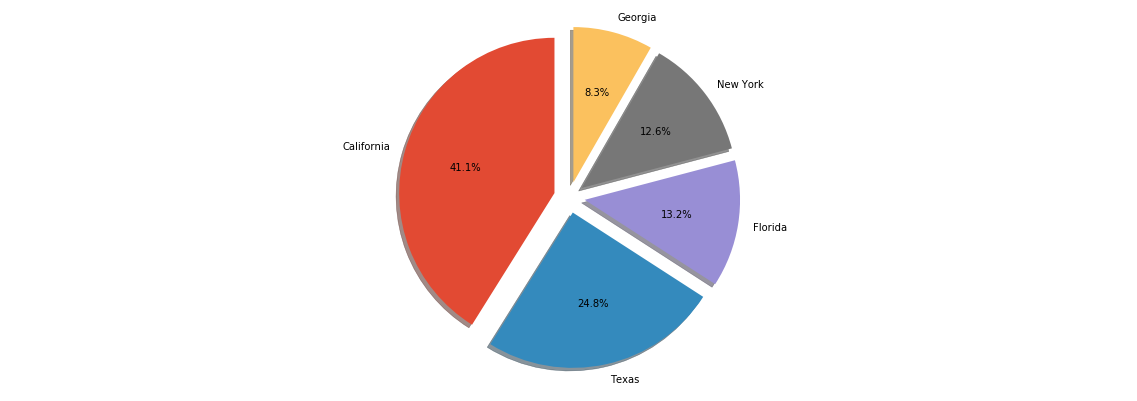

In [49]:
explode[maxIndex] = 0.1

fig1, ax1 = plt.subplots()

ax1.pie(top_2010[:5], explode=[0.1, 0.1, 0.1, 0.1, 0.1], labels=labels2010[:5],
                autopct='%1.1f%%', shadow=True, startangle=90) #Displays 5 largest Sample Size

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 2012 Sample (Same process as above with according to data set)

In [50]:
yearStart2012 = folium.Map(location=[39.0997, -94.5786], zoom_start=4)

locations = np.zeros((54, 2), dtype=np.float32)

year2012 = newData[newData["YearStart"] == 2012]

stateSample2012 = []
for state in newData["LocationDesc"].value_counts().index:
    if np.isnan((year2012[year2012["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1])):
        stateSample2012.append((0.0, state))
    else:
        stateSample2012.append((year2012[year2012["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1], state))

stateSample2012 = sorted(stateSample2012, reverse=True) #Sorts from largest to smallest

count = 0
for state in stateSample2012:
    locationList = []
    x = newData[newData["LocationDesc"] == str(stateSample2012[count][1])]["GeoLocation"].iloc[0].split(',')[0].split('(')[1]
    y = newData[newData["LocationDesc"] == str(stateSample2012[count][1])]["GeoLocation"].iloc[0].split(',')[1].split(')')[0]
    locationList.append(x)
    locationList.append(y)
    folium.Marker(location=locationList, popup=str(stateSample2012[count][1]) + "\n" + 
                  str(stateSample2012[count][0])).add_to(yearStart2012)
    count += 1

# Pie Chart of the 5 Largest State Cum. Sample Size - 2008

labels2012 = []
top_2012 = []
explode = []
count = 0
maxCumSum = 0
maxIndex = 0

for state in stateSample2012:
    labels2012.append(stateSample2012[count][1])
    if not np.isnan(stateSample2012[count][0]):    
        top_2012.append(stateSample2012[count][0])
    else:
        top_2012.append(0)
    if stateSample2012[count][0] > maxCumSum:
        maxCumSum = stateSample2012[count][0]
        maxIndex = count
    explode.append(0)
    count += 1

In [51]:
yearStart2012

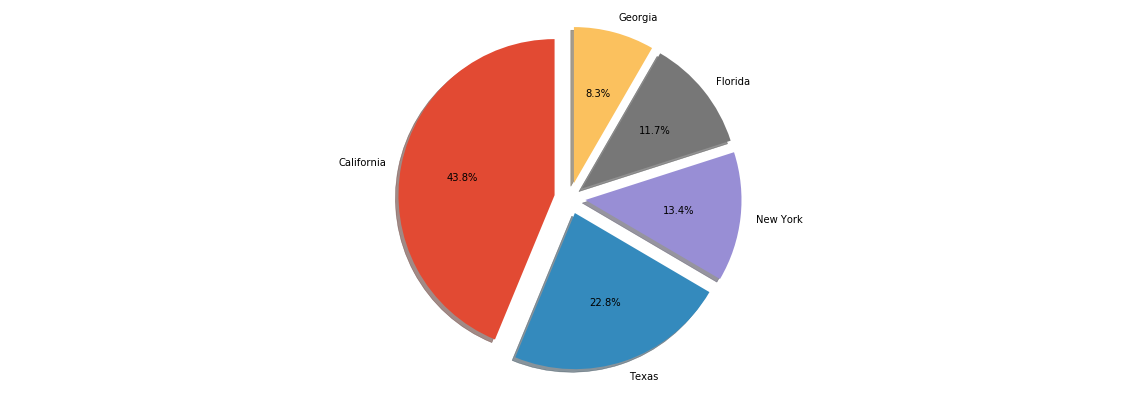

In [52]:
explode[maxIndex] = 0.1

fig1, ax1 = plt.subplots()

ax1.pie(top_2012[:5], explode=[0.1, 0.1, 0.1, 0.1, 0.1], labels=labels2012[:5],
                autopct='%1.1f%%', shadow=True, startangle=90) #Displays 5 largest Sample Size

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 2014 Sample (Same process as above with according to data set)

In [53]:
yearStart2014 = folium.Map(location=[39.0997, -94.5786], zoom_start=4)

locations = np.zeros((54, 2), dtype=np.float32)

year2014 = newData[newData["YearStart"] == 2014]

stateSample2014 = []
for state in newData["LocationDesc"].value_counts().index:
    if np.isnan((year2014[year2014["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1])):
        stateSample2014.append((0.0, state))
    else:
        stateSample2014.append((year2014[year2014["LocationDesc"] == state]["Sample_Size"].cumsum().iloc[-1], state))

stateSample2014 = sorted(stateSample2014, reverse=True) #Sorts from largest to smallest

count = 0
for state in stateSample2014:
    locationList = []
    x = newData[newData["LocationDesc"] == str(stateSample2014[count][1])]["GeoLocation"].iloc[0].split(',')[0].split('(')[1]
    y = newData[newData["LocationDesc"] == str(stateSample2014[count][1])]["GeoLocation"].iloc[0].split(',')[1].split(')')[0]
    locationList.append(x)
    locationList.append(y)
    folium.Marker(location=locationList, popup=str(stateSample2014[count][1]) + "\n" + 
                  str(stateSample2014[count][0])).add_to(yearStart2014)
    count += 1

# Pie Chart of the 5 Largest State Cum. Sample Size - 2008

labels2014 = []
top_2014 = []
explode = []
count = 0
maxCumSum = 0
maxIndex = 0

for state in stateSample2014:
    labels2014.append(stateSample2014[count][1])
    if not np.isnan(stateSample2014[count][0]):    
        top_2014.append(stateSample2014[count][0])
    else:
        top_2014.append(0)
    if stateSample2014[count][0] > maxCumSum:
        maxCumSum = stateSample2014[count][0]
        maxIndex = count
    explode.append(0)
    count += 1

In [54]:
yearStart2014

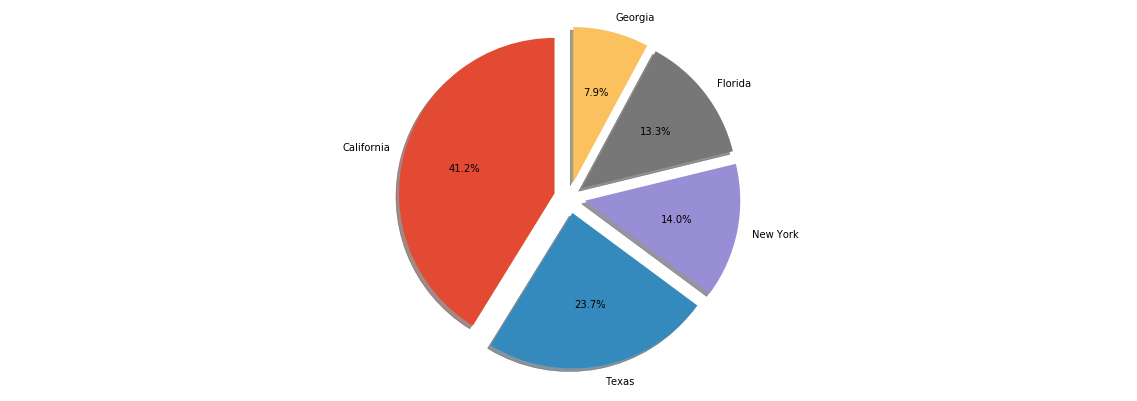

In [55]:
explode[maxIndex] = 0.1

fig1, ax1 = plt.subplots()

ax1.pie(top_2014[:5], explode=[0.1, 0.1, 0.1, 0.1, 0.1], labels=labels2014[:5],
                autopct='%1.1f%%', shadow=True, startangle=90) #Displays 5 largest Sample Size

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Sample Size Changes from 2008 to 2014 State base

In [56]:
# Creating data structure for storing all states and territories total sample sizes for all years
statesSampleSizes = np.zeros((54, 4), dtype=np.float32)

### The next 4 Cells reformats each data structure for creating data frames next

In [57]:
inverseSample2008 = []
for state in stateSample2008:
    inverseSample2008.append((state[1], state[0]))
inverseSample2008 = sorted(inverseSample2008)

In [58]:
inverseSample2010 = []
for state in stateSample2010:
    inverseSample2010.append((state[1], state[0]))
inverseSample2010 = sorted(inverseSample2010)

In [59]:
inverseSample2012 = []
for state in stateSample2012:
    inverseSample2012.append((state[1], state[0]))
inverseSample2012 = sorted(inverseSample2012)

In [60]:
inverseSample2014 = []
for state in stateSample2014:
    inverseSample2014.append((state[1], state[0]))
inverseSample2014 = sorted(inverseSample2014)

### These next 4 Cells populate the statesSampleSizes numpy matrix

In [61]:
count = 0
for state in inverseSample2008:
    statesSampleSizes[count][0] = state[1]
    count += 1

In [62]:
count = 0
for state in inverseSample2010:
    statesSampleSizes[count][1] = state[1]
    count += 1

In [63]:
count = 0
for state in inverseSample2012:
    statesSampleSizes[count][2] = state[1]
    count += 1

In [64]:
count = 0
for state in inverseSample2014:
    statesSampleSizes[count][3] = state[1]
    count += 1

---

In [65]:
# Converting matrix to data frame
sampleFrame = pd.DataFrame(data=statesSampleSizes, columns=["2008 Cumulative Sample Size", 
                                                            "2010 Cumulative Sample Size",
                                                            "2012 Cumulative Sample Size",
                                                            "2014 Cumulative Sample Size"])

In [66]:
# Reindexing data frame according to state name
sampleFrame = sampleFrame.set_index(np.sort(newData["LocationDesc"].value_counts().index))

In [67]:
sampleFrame

,2008 Cumulative Sample Size,2010 Cumulative Sample Size,2012 Cumulative Sample Size,2014 Cumulative Sample Size
Alabama,528905.0,541852.0,532400.0,514788.0
Alaska,94624.0,105250.0,93169.0,64401.0
Arizona,629500.0,750167.0,615908.0,577279.0
Arkansas,264044.0,333840.0,343034.0,300061.0
California,5698225.0,6273612.0,6676475.0,6024457.0
Colorado,344836.0,417898.0,443386.0,397323.0
Connecticut,194094.0,236640.0,222484.0,206024.0
Delaware,69520.0,81964.0,80482.0,82400.0
District of Columbia,49108.0,55745.0,57183.0,48993.0
Florida,1609464.0,2020344.0,1785952.0,1946735.0


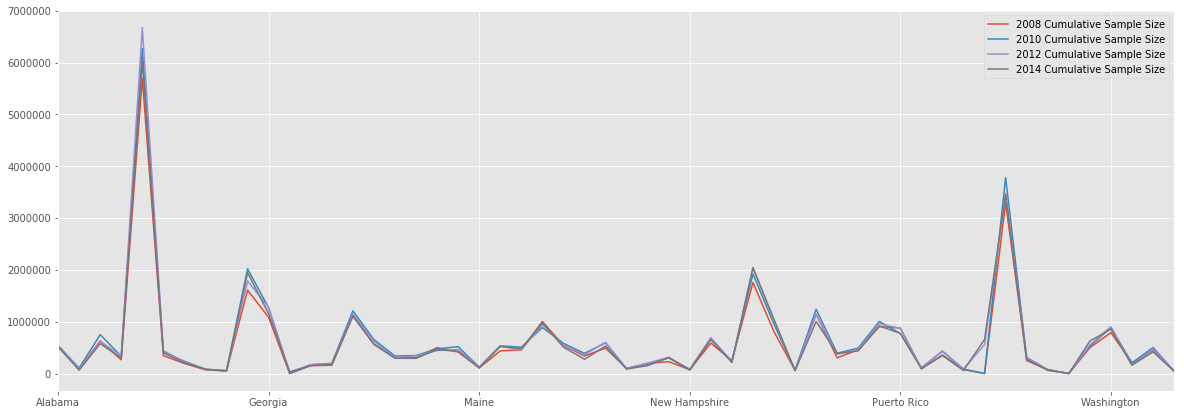

In [68]:
# Displaying data frame as line graph
sampleFrame.plot()

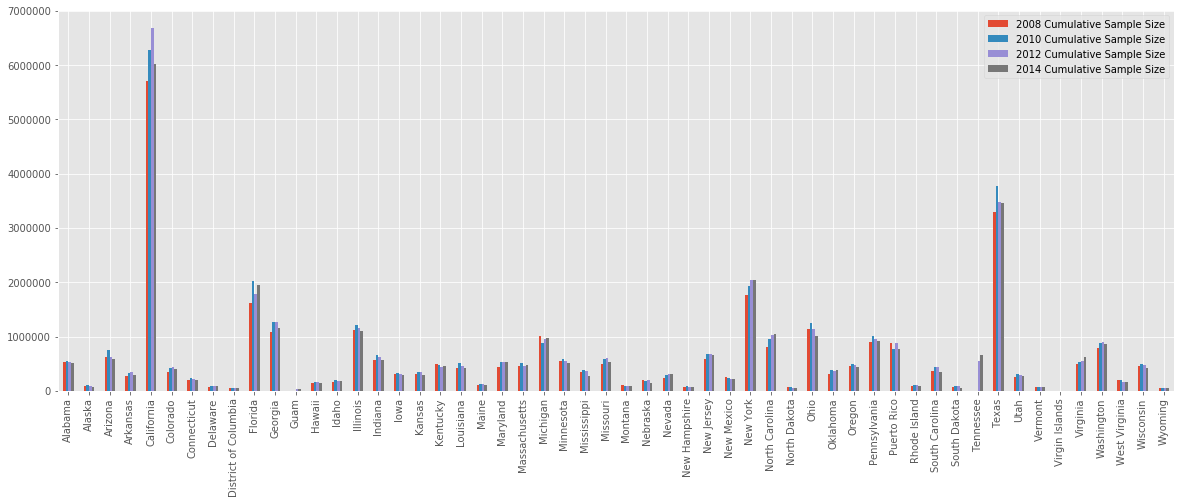

In [69]:
# Displaying data frame as bar graph
sampleFrame.plot(kind="Bar")